In [54]:
#UMGC - DATA 645
#Unit 6 Assignment: Decision Trees
#Created By: Nadia Malik
#Updated 9/22/2024

In [55]:
#Load libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import train_test_split
#Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc

In [56]:
df = pd.read_csv('cmc.csv') #read dataset

In [57]:
df.head(10) #View first 10

,WifeAge,WifeEducation,HusbandEducation,NumChildren,WifeReligion,WifeWorking,HusbandOccupation,LivingStandardIndex,MediaExposure,ContraceptiveMethod
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1
5,19,4,4,0,1,1,3,3,0,1
6,38,2,3,6,1,1,3,2,0,1
7,21,3,3,1,1,0,3,2,0,1
8,27,2,3,3,1,1,3,4,0,1
9,45,1,1,8,1,1,2,2,1,1


In [58]:
#Show the number of rows and columns
df.shape

(1473, 10)

In [59]:
#Overview of variables and data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   WifeAge              1473 non-null   int64
 1   WifeEducation        1473 non-null   int64
 2   HusbandEducation     1473 non-null   int64
 3   NumChildren          1473 non-null   int64
 4   WifeReligion         1473 non-null   int64
 5   WifeWorking          1473 non-null   int64
 6   HusbandOccupation    1473 non-null   int64
 7   LivingStandardIndex  1473 non-null   int64
 8   MediaExposure        1473 non-null   int64
 9   ContraceptiveMethod  1473 non-null   int64
dtypes: int64(10)
memory usage: 115.2 KB
None


In [60]:
#Check for null values
print(df.isnull().sum())

WifeAge                0
WifeEducation          0
HusbandEducation       0
NumChildren            0
WifeReligion           0
WifeWorking            0
HusbandOccupation      0
LivingStandardIndex    0
MediaExposure          0
ContraceptiveMethod    0
dtype: int64


In [61]:
df.duplicated().sum() #Check for duplicates
#Duplicates are those with the same information, ok in this case

48

In [62]:
df.columns #Show column names
#All are relevant for analysis

Index(['WifeAge', 'WifeEducation', 'HusbandEducation', 'NumChildren',
       'WifeReligion', 'WifeWorking', 'HusbandOccupation',
       'LivingStandardIndex', 'MediaExposure', 'ContraceptiveMethod'],
      dtype='object')

In [63]:
#Summary statistics of variables
print(df.describe())

           WifeAge  WifeEducation  HusbandEducation  NumChildren  \
count  1473.000000    1473.000000       1473.000000  1473.000000   
mean     32.538357       2.958588          3.429735     3.261371   
std       8.227245       1.014994          0.816349     2.358549   
min      16.000000       1.000000          1.000000     0.000000   
25%      26.000000       2.000000          3.000000     1.000000   
50%      32.000000       3.000000          4.000000     3.000000   
75%      39.000000       4.000000          4.000000     4.000000   
max      49.000000       4.000000          4.000000    16.000000   

       WifeReligion  WifeWorking  HusbandOccupation  LivingStandardIndex  \
count   1473.000000  1473.000000        1473.000000          1473.000000   
mean       0.850645     0.749491           2.137814             3.133741   
std        0.356559     0.433453           0.864857             0.976161   
min        0.000000     0.000000           1.000000             1.000000   
25%    

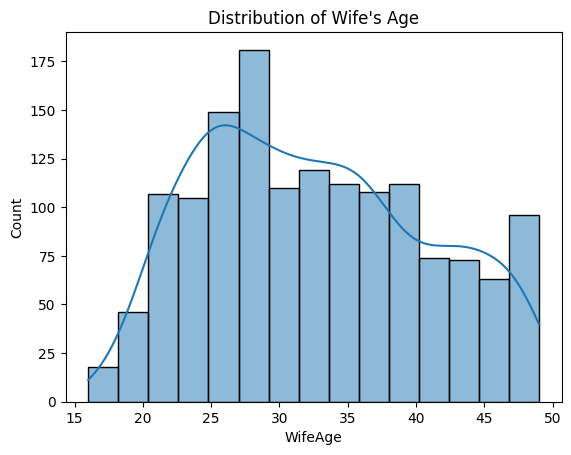

In [64]:
#Histogram of Wife Ages
sns.histplot(df['WifeAge'], kde=True)
plt.title('Distribution of Wife\'s Age')
plt.show()

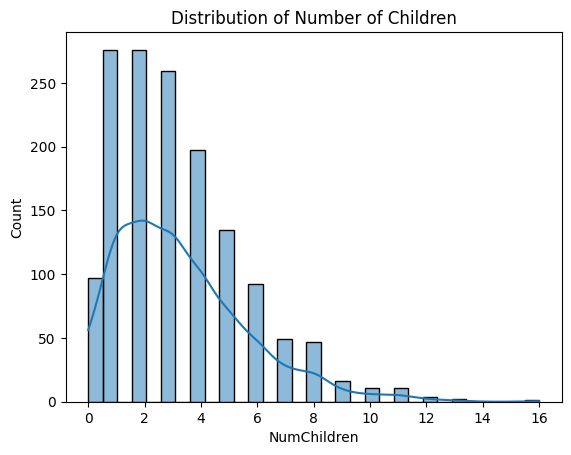

In [65]:
#Histogram of Number of Children
sns.histplot(df['NumChildren'], kde=True)
plt.title('Distribution of Number of Children')
plt.show()

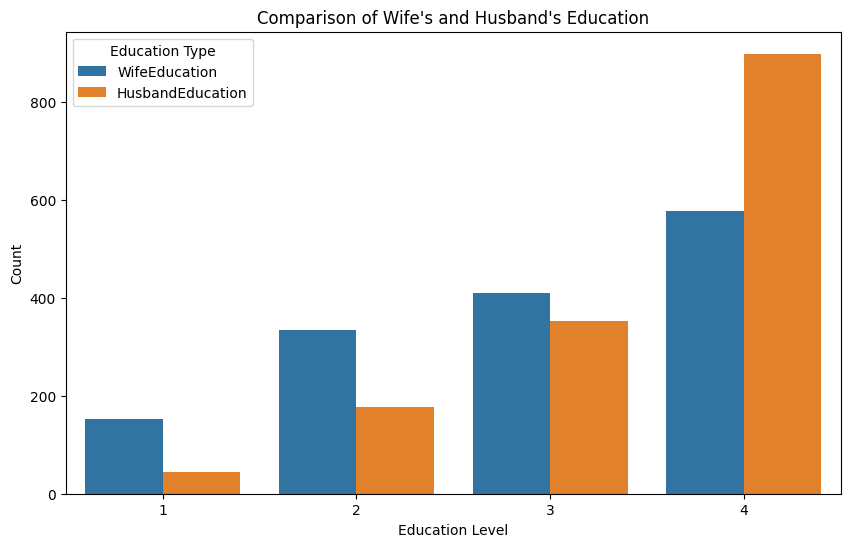

In [66]:
#Show long-form for plotting
df_melted = df.melt(value_vars=['WifeEducation', 'HusbandEducation'],
                    var_name='EducationType',
                    value_name='EducationLevel')

#Show both with one axis for count
plt.figure(figsize=(10, 6))
sns.countplot(x='EducationLevel', hue='EducationType', data=df_melted)
plt.title('Comparison of Wife\'s and Husband\'s Education')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Education Type')
plt.show()

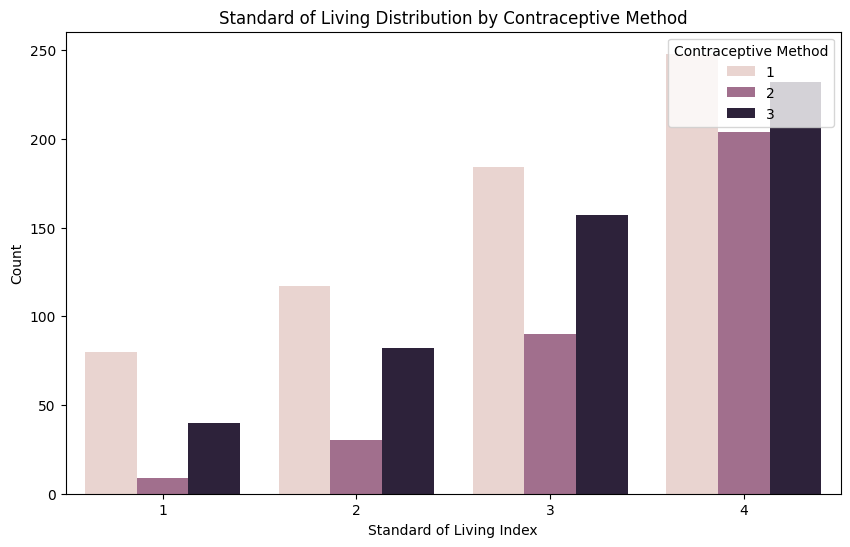

In [67]:
#Plot the bar graph of standard of living by contraceptive method
plt.figure(figsize=(10, 6))
sns.countplot(x='LivingStandardIndex', hue='ContraceptiveMethod', data=df)
plt.title('Standard of Living Distribution by Contraceptive Method')
plt.xlabel('Standard of Living Index')
plt.ylabel('Count')
plt.legend(title='Contraceptive Method', loc='upper right')
plt.show()

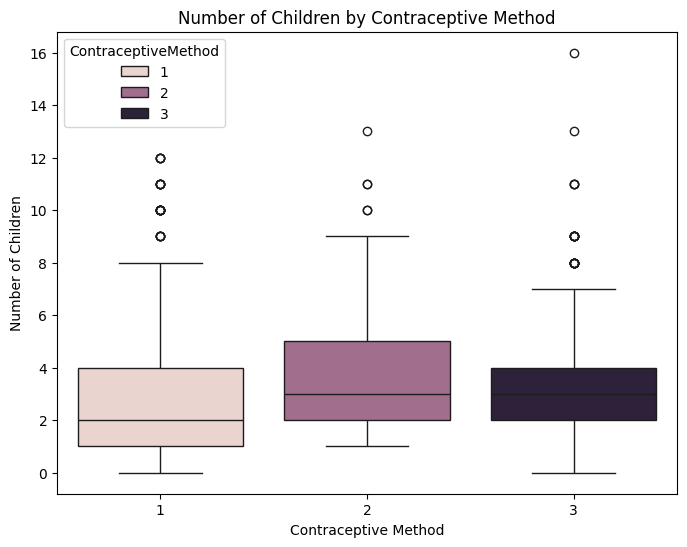

In [68]:
#Number of Children vs Contraceptive Method Used
plt.figure(figsize=(8, 6))
sns.boxplot(x='ContraceptiveMethod', y='NumChildren',hue='ContraceptiveMethod', data=df)
plt.title('Number of Children by Contraceptive Method')
plt.xlabel('Contraceptive Method')
plt.ylabel('Number of Children')
plt.show()

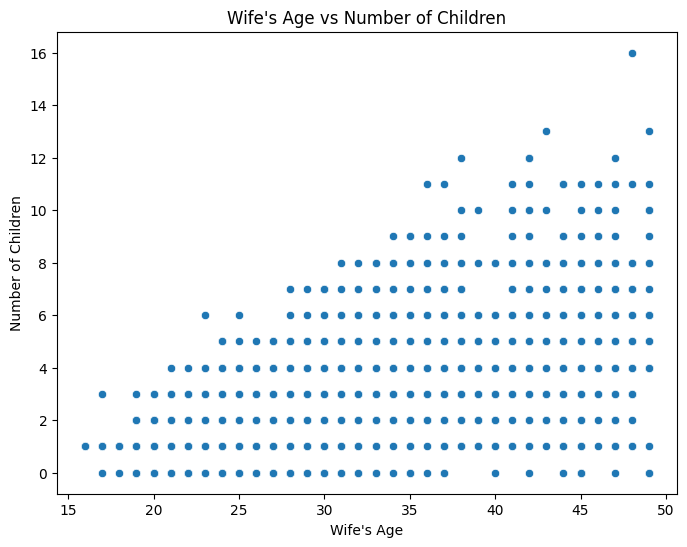

In [69]:
#Wife's Age vs Number of Children
plt.figure(figsize=(8, 6))
sns.scatterplot(x='WifeAge', y='NumChildren', data=df)
plt.title('Wife\'s Age vs Number of Children')
plt.xlabel('Wife\'s Age')
plt.ylabel('Number of Children')
plt.show()

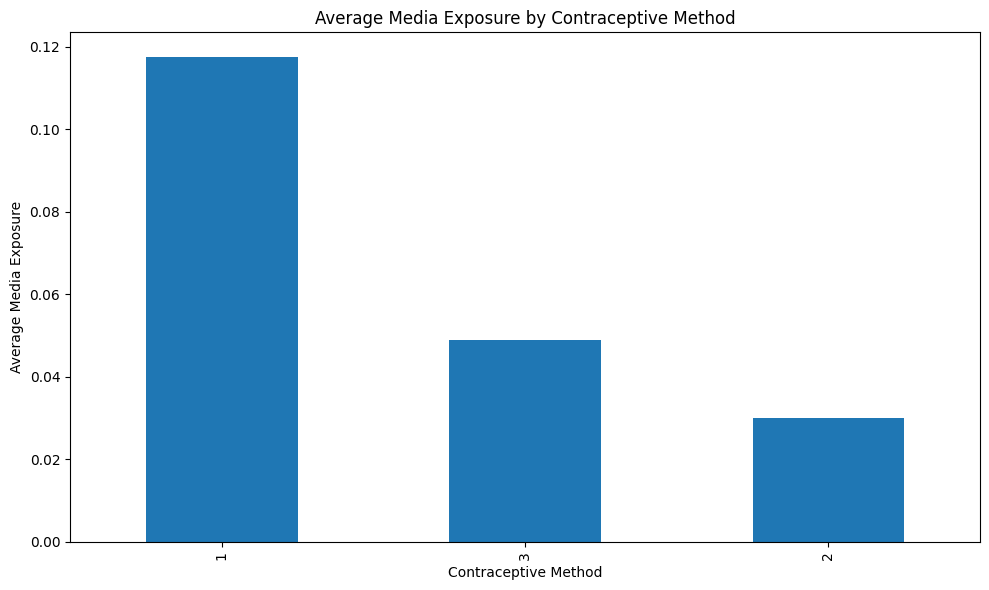

In [70]:
#Calculate mean media exposure for each contraceptive method
mean_exposure = df.groupby('ContraceptiveMethod')['MediaExposure'].mean().sort_values(ascending=False)

#Create a bar plot
plt.figure(figsize=(10, 6))
mean_exposure.plot(kind='bar')
#Label plot
plt.title('Average Media Exposure by Contraceptive Method')
plt.xlabel('Contraceptive Method')
plt.ylabel('Average Media Exposure')
# Adjust layout and display
plt.tight_layout()
plt.show()

In [71]:
#Treat outliers for NumChildren
Q1 = df['NumChildren'].quantile(0.25)
Q3 = df['NumChildren'].quantile(0.75)
IQR = Q3 - Q1
#Filter out outliers
df_cleaned = df[(df['NumChildren'] >= Q1 - 1.5 * IQR) & (df['NumChildren'] <= Q3 + 1.5 * IQR)]

In [72]:
#Define features and target variable
X= df.drop('ContraceptiveMethod', axis=1) #feature variables
y = df['ContraceptiveMethod']  #Target variable

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Create the Decision Tree- Initial model without hyperparameter tuning
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

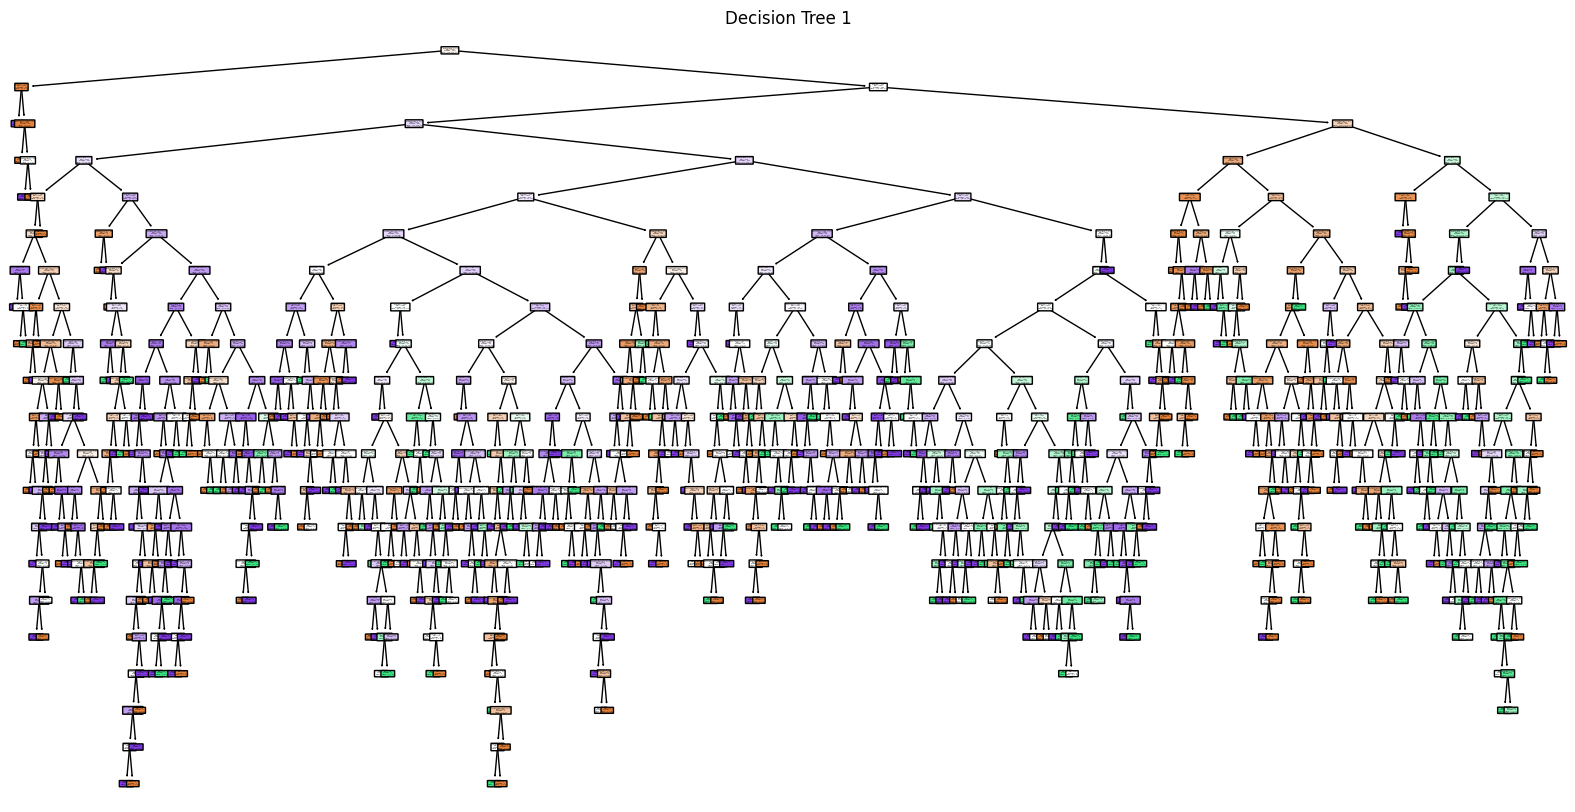

In [73]:
#Display decision tree model 1
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No Use', 'Long-term', 'Short-term'], rounded=True)
plt.title("Decision Tree 1")
plt.show()

In [74]:
#Evaluate the initial model accuracy
y_pred = clf.predict(X_test)
print(f"Initial Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Initial Accuracy: 0.49547511312217196
              precision    recall  f1-score   support

           1       0.60      0.63      0.62       194
           2       0.37      0.32      0.34       101
           3       0.42      0.44      0.43       147

    accuracy                           0.50       442
   macro avg       0.47      0.46      0.46       442
weighted avg       0.49      0.50      0.49       442



In [75]:
#Hyperparameter tuning to improve model accuracy
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [5, 10, 15],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

#Show best model accuracy
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")


Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5}


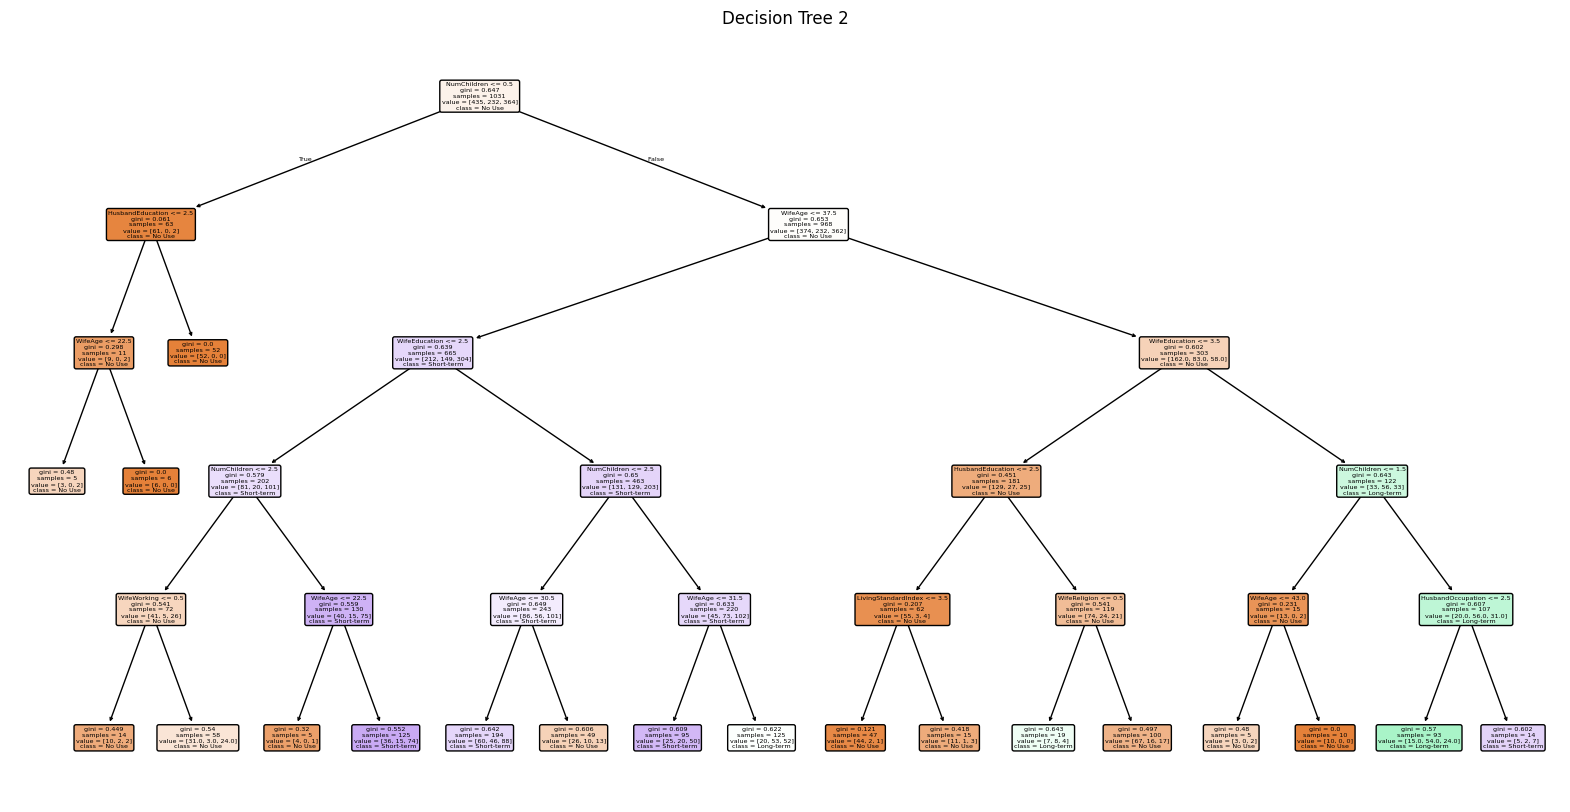

In [76]:
#Display the tuned decision tree 2
plt.figure(figsize=(20,10))
plot_tree(best_model, filled=True, feature_names=X.columns, class_names=['No Use', 'Long-term', 'Short-term'], rounded=True)
plt.title("Decision Tree 2")
plt.show()

In [77]:
#Evaluate tuned model
y_pred_tuned = best_model.predict(X_test)
print(f"Tuned Model Accuracy: {accuracy_score(y_test, y_pred_tuned)}")
print(classification_report(y_test, y_pred_tuned))

Tuned Model Accuracy: 0.5610859728506787
              precision    recall  f1-score   support

           1       0.70      0.58      0.63       194
           2       0.42      0.42      0.42       101
           3       0.51      0.64      0.57       147

    accuracy                           0.56       442
   macro avg       0.55      0.54      0.54       442
weighted avg       0.58      0.56      0.56       442



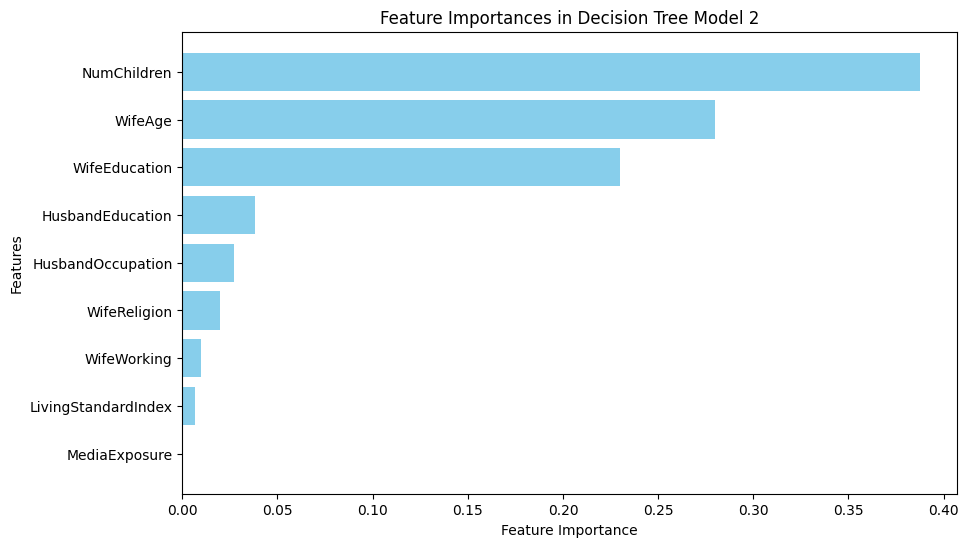

In [78]:
#Extract feature importances from best model
importances = best_model.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
#Sort the df by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

#Visualize feature importances with a bar plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances in Decision Tree Model 2')
plt.gca().invert_yaxis()
plt.show()

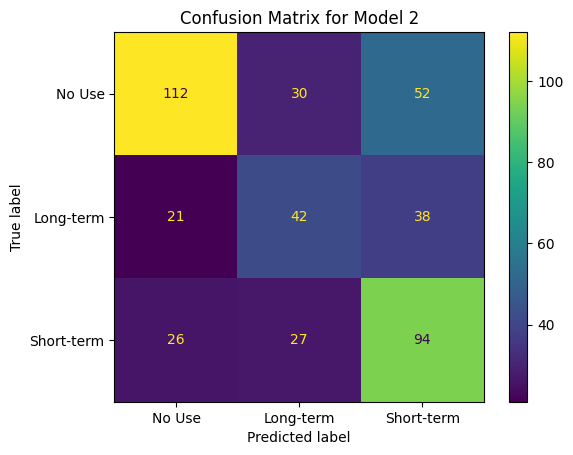

In [79]:
#Confusion matrix display for tuned model
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
ConfusionMatrixDisplay(cm_tuned, display_labels=['No Use', 'Long-term', 'Short-term']).plot()
plt.title("Confusion Matrix for Model 2")
plt.show()